In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import tree, datasets
from sklearn.model_selection import train_test_split

wine = datasets.load_wine()

#只选取数据集的前两个特征
X = wine.data[:, :2]
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y)


In [8]:

#设置最大深度为3
clf = tree.DecisionTreeClassifier(max_depth=3)
#拟合
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

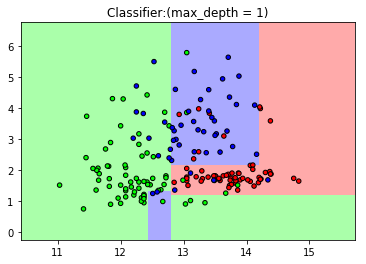

In [9]:
#定义图像中分区的颜色和散点的颜色
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#分别用样本的两个特征创建图像和横轴纵轴
x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min()-1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

#给每个分类中的样本分配不同的颜色
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

plt.scatter(X[:, 0], X[:, 1], c = y,cmap = cmap_bold, edgecolors='k', s = 20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Classifier:(max_depth = 1)")

plt.show()

In [32]:
import graphviz
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file="wine.dot", class_names=wine.target_names,
                feature_names=wine.feature_names[:2], impurity=False, filled=True)
with open("wine.dot") as f:
    a = f.read()
graphviz.Source(a)

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH